##**DATA PREPARATION & SYSTEM HEALTH**

Com a estruturação do sistema de monitoramento concluída, foi possível captar dados provenientes da aplicação alvo, e armazená-los num banco de dados para uso futuro. Nesta etapa os valores coletados foram ajustados em seu *type* para a utilização dos mesmos pelo modelo. Também foi ajustado o valor do campo '*available*', a fim de representar uma base estatística que servirá como guia de probabilidade para a IA.

In [48]:
from matplotlib import pyplot as plt
import pandas as pd

In [49]:
df = pd.read_csv('metrics_7.csv')

In [50]:
cols = ['time_response_get',
'time_response_post',
'memory_used',
'heap_used',
'non_heap_used',
'cpu_usage']

correlation_weight = {'time_response_get': 0.35570470566746554,
'time_response_post': 0.3885479724010192,
'memory_used': 0.7943337525975255,
'heap_used': 0.7184825696993615,
'non_heap_used': 0.8929562798033213,
'cpu_usage': 0.7626769865456956}

df = df.fillna(0)
df = df.astype({'time_response_get': float, 
                'time_response_post': float, 
                'cpu_usage': float, 
                'available': float, 
                'memory_used': float, 
                'heap_used': float, 
                'non_heap_used': float
                })

In [51]:
i = 0
while i < len(df['time_response_get']):
  available_pct = 0
  for column in cols:
    metric_percent = (df[column][i] * 99) / df[column][90]
    available_pct = available_pct + ((metric_percent * (1 + correlation_weight[column])) / 2)
  available_pct = 100 - (available_pct / len(cols))
  df['available'][i] = available_pct
  i = i + 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


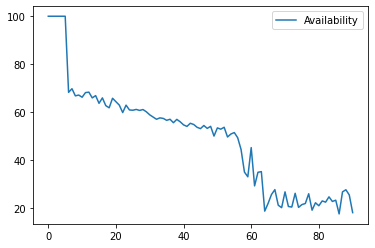

In [52]:
plt.plot(list(df['available'][:91]), label='Availability')
plt.legend(loc='upper right');